<a href="https://colab.research.google.com/github/Muvazana/Artificial-Intelligence---Clustering-Kmeans-Scratch/blob/main/Tugas_Besar_1_Machine_Learning_(Unsupervised_Learning)_1301194482.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas Besar 1 Machine Learning (Clustering)**
## Moch. Nauval Rizaldi Nasril | 1301194482 | IF-43-08

# 1. Importing/Installing Package

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

## 1.1. Dataset Management

In [ ]:
# Read Train Data
train_data = pd.read_csv("https://raw.githubusercontent.com/Muvazana/Artificial-Intelligence---Clustering-Kmeans-Scratch/main/kendaraan_train.csv")
train_data.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [ ]:
# Read Test Data
test_data = pd.read_csv("https://raw.githubusercontent.com/Muvazana/Artificial-Intelligence---Clustering-Kmeans-Scratch/main/kendaraan_test.csv")
test_data.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0


In [ ]:
# Penggabungan train data dan test data (pada kasus Unsupervised ini adalah "Optional")
raw_data = pd.concat([train_data, test_data])
raw_data.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1.0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2.0,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3.0,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4.0,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5.0,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


# 2. Pre-processing Data

## 2.1. Explorasi Dataset

In [ ]:
# Mengecek bentuk dari Dataset
raw_data.shape

(333470, 12)

In [ ]:
# Mengecek type data pada setiap column
raw_data.dtypes

id                   float64
Jenis_Kelamin         object
Umur                 float64
SIM                  float64
Kode_Daerah          float64
Sudah_Asuransi       float64
Umur_Kendaraan        object
Kendaraan_Rusak       object
Premi                float64
Kanal_Penjualan      float64
Lama_Berlangganan    float64
Tertarik               int64
dtype: object

In [ ]:
# Mengecek nilai null pada setiap column
raw_data.isnull().sum()

id                   47639
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [ ]:
# Statistik dari setiap column
raw_data.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,319256.000000,319066.000000,319164.000000,319241.000000,318901.000000,319171.000000,319478.000000,333470.000000
mean,142916.000000,38.840028,0.997859,26.394380,0.458603,30550.097899,112.045299,154.310350,0.122551
std,82512.446734,15.526398,0.046217,13.246852,0.498284,17192.548724,54.196470,83.686932,0.327921
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24397.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31660.000000,133.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39392.000000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
# Info dari setiap column
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333470 entries, 0 to 47638
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  float64
 1   Jenis_Kelamin      319030 non-null  object 
 2   Umur               319256 non-null  float64
 3   SIM                319066 non-null  float64
 4   Kode_Daerah        319164 non-null  float64
 5   Sudah_Asuransi     319241 non-null  float64
 6   Umur_Kendaraan     319195 non-null  object 
 7   Kendaraan_Rusak    319282 non-null  object 
 8   Premi              318901 non-null  float64
 9   Kanal_Penjualan    319171 non-null  float64
 10  Lama_Berlangganan  319478 non-null  float64
 11  Tertarik           333470 non-null  int64  
dtypes: float64(8), int64(1), object(3)
memory usage: 33.1+ MB


## 2.2. Menghilangkan Missing Value

In [ ]:
# drop column "id" pada dataset
raw_data.drop(columns=["id"], inplace=True)

In [ ]:
# Menghilangkan missing Value
# dengan aturan sebagai berikut :
#   - jika type column adalah object maka strategi untuk mengisi menggunakan modus dari column tersebut
#   - jika type column adalah bukan object maka strategi untuk mengisi menggunakan mean(nilai rata-rata) dari column tersebut
for col_name in raw_data.columns:
  if raw_data[col_name].dtypes == "object" or col_name == 'Kode_Daerah' or col_name == 'Kanal_Penjualan':
    raw_data[col_name].fillna(raw_data[col_name].mode()[0], inplace=True)
  else:
    raw_data[col_name].fillna(raw_data[col_name].mean(), inplace=True)

In [ ]:
# Mengecek nilai null pada setiap column setelah menghilangkan Missing Value
raw_data.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

## 2.3. Merubah Object Value ke Numerical Value

In [ ]:
# Merubah categorical value ke number value (categorical encoding)
# mengetahui unik value dari setiap kolom bertipe object
print("Jenis_Kelamin => ", raw_data['Jenis_Kelamin'].unique())
print("Umur_Kendaraan => ", raw_data["Umur_Kendaraan"].unique())
print("Kendaraan_Rusak => ", raw_data["Kendaraan_Rusak"].unique())

Jenis_Kelamin =>  ['Wanita' 'Pria']
Umur_Kendaraan =>  ['< 1 Tahun' '> 2 Tahun' '1-2 Tahun']
Kendaraan_Rusak =>  ['Tidak' 'Pernah']


In [ ]:
# variable untuk merubah categori value menjadi numeric value
data_mapping = {
    "Jenis_Kelamin" : {"Wanita":0, "Pria":1},
    "Umur_Kendaraan" : {"< 1 Tahun":1, "1-2 Tahun":2, "> 2 Tahun":3},
    "Kendaraan_Rusak" : {"Tidak":0, "Pernah":1}
}

# mereplace categorical value dengan numerical value
df_pre_processing = raw_data.replace(data_mapping)
df_pre_processing.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0,30.0,1.0,33.0,1.0,1,0,28029.0,152.0,97.0,0
1,1,48.0,1.0,39.0,0.0,3,1,25800.0,29.0,158.0,0
2,1,21.0,1.0,46.0,1.0,1,0,32733.0,160.0,119.0,0
3,0,58.0,1.0,48.0,0.0,2,0,2630.0,124.0,63.0,0
4,1,50.0,1.0,35.0,0.0,3,1,34857.0,88.0,194.0,0


## 2.4. Drop Duplicate Data

In [ ]:
# Cek Data yang duplikat
df_pre_processing.duplicated().sum()

328

In [ ]:
# Drop Data yng duplikat
df_pre_processing.drop_duplicates(inplace=True)

In [ ]:
# Cek Data yang duplikat
df_pre_processing.duplicated().sum()

0

## 2.5. Drop Feature

Beberapa Feature yang di drop adalah sebagai berikut:
- Jenis_Kelamin
- SIM
- Sudah_Asuransi
- Umur_Kendaraan
- Kendaraan_Rusak

Feature tersebut di drop karena akan menyebabkan visualisasi susah untuk dibaca

In [ ]:
list_feature_droped = ['Jenis_Kelamin', 'SIM', 'Sudah_Asuransi', 'Umur_Kendaraan', 'Kendaraan_Rusak']
df_pre_processing.drop(columns=list_feature_droped, inplace=True)
df_pre_processing.head()

,Umur,Kode_Daerah,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,30.0,33.0,28029.0,152.0,97.0,0
1,48.0,39.0,25800.0,29.0,158.0,0
2,21.0,46.0,32733.0,160.0,119.0,0
3,58.0,48.0,2630.0,124.0,63.0,0
4,50.0,35.0,34857.0,88.0,194.0,0


## 2.6. Menentukan Korelasi antar Kolumn

Text(0.5, 1.0, 'Correlation Heatmap')

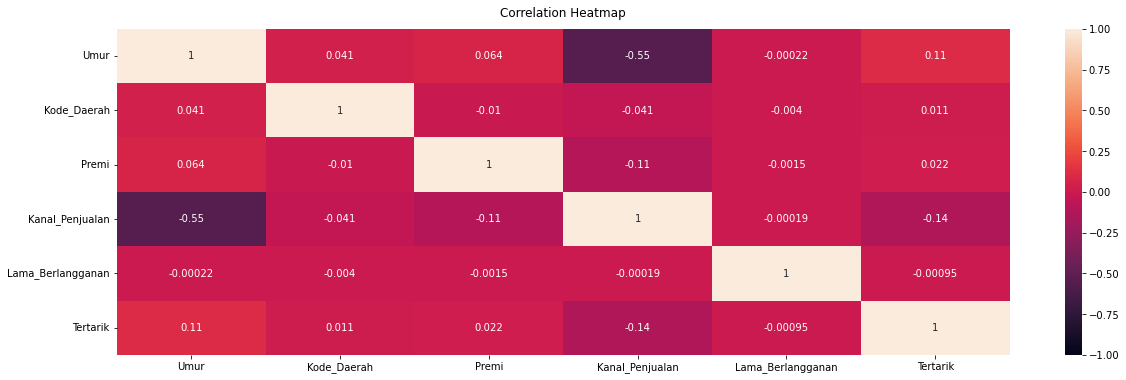

In [ ]:
# menghitung correlasi antar column
plt.figure(figsize=(20, 6))
heatmap = sns.heatmap(df_pre_processing.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

dari heatmap korelasi di atas dapat diketahui nilai dari setiap korelasi antar kolum, semakin nilainya mendekati 1 maka kolum tersebut mempunyai korelasi yang tinggi dan begitu juga sebaliknya. disini saya akan mengambil nilai korelasi yang (tinggi,rendah) dengan acuan pada kolum "Tertarik" dan mengabaikan kolum yang bertipe object atau categori yaitu sebagai berikut:

- bernilai tinggi : Umur dan Premi
- bernilai rendah : Lama_Berlangganan dan Kanal_Penjualan

## 2.7. Mengidentifikasi Outlier

kolum yang akan diambil adalah Umur, Premi, Kode_Daerah dan Kanal_Penjualan

In [ ]:
def show_boxplot(x):
  red_circle = dict(markerfacecolor='blue', marker='o', markeredgecolor='white')

  fig, axs = plt.subplots(1, len(x.columns), figsize=(20,5))

  for i, ax in enumerate(axs.flat):
      ax.boxplot(x.iloc[:,i], flierprops=red_circle)
      ax.set_title(x.columns[i], fontsize=10, fontweight='bold')
      ax.tick_params(axis='y', labelsize=8)
      
  plt.tight_layout()

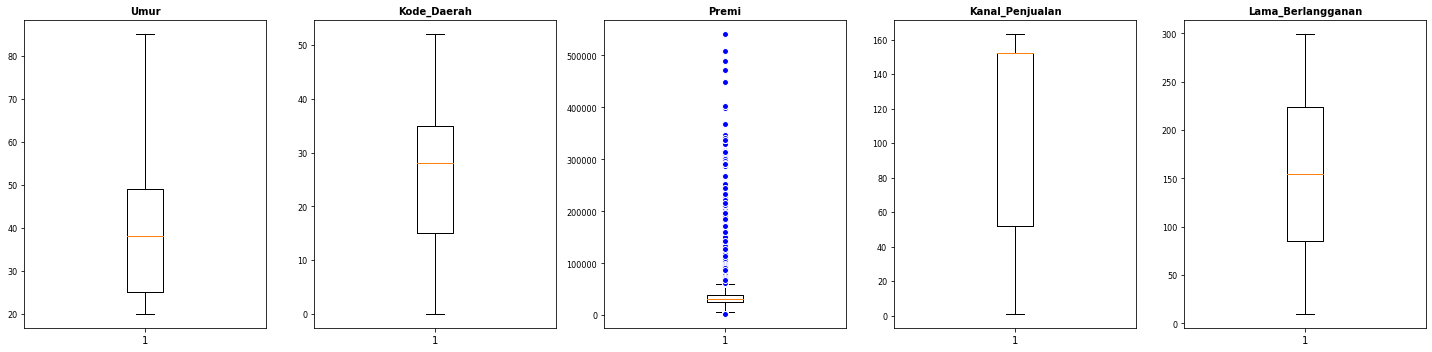

In [ ]:
# Boxplot Sebelum Outlier Dihilangkan
show_boxplot(df_pre_processing.loc[:, df_pre_processing.columns[:-1]])

pada boxplot diatas didapatkan kolom "Premi" memiliki banyak sekali outlier. tetapi setelah diidentifikasi outlier tersebut bukan termasuk potensi outlier yang di maksud. karena pada kasus "Premi", data tersebut murni karena user itu sendiri

In [ ]:
df_pre_processing_outlier = df_pre_processing.copy()

In [ ]:
# menghilangkan outlier pada column "Premi"
# def delete_outlier(x, cols):
#   Q1 = x[cols].quantile(0.25)
#   Q3 = x[cols].quantile(0.75)
#   IQR = Q3 - Q1
#   floor = Q1 - 1.5 * IQR
#   ceiling = Q3 + 1.5 * IQR

#   return x[~((x[cols] < floor) |(x[cols] > ceiling))]

# df_pre_processing_outlier = delete_outlier(df_pre_processing, "Premi")
# df_pre_processing_outlier.shape

In [ ]:
# Boxplot Sesudah Outlier Dihilangkan
# show_boxplot(df_pre_processing_outlier.loc[:, ('Kendaraan_Rusak','Umur_Kendaraan','Umur','Premi')])

## 2.8. Seleksi Data

Memisahkan kolum yang akan dipakai untuk K-Means.
disini saya menggunakan 4 kolum untuk bahan ekperimen saya yaitu Kode_Daerah, Kanal_Penjualan, Umur dan Premi. 4 kolum tersebut akan di bagi lagi menjadi 2 bagian adalah sebagai berikut:

- untuk kolum yang ber type numeric (dataset1_raw) : Umur dan Premi
- untuk kolum yang ber type object (dataset2_raw) : Kode_Daerah dan Kanal_Penjualan

terdapat kolum yang menjadi (label_target) yaitu kolum "Tertarik"

In [ ]:
raw_data.dtypes

Jenis_Kelamin         object
Umur                 float64
SIM                  float64
Kode_Daerah          float64
Sudah_Asuransi       float64
Umur_Kendaraan        object
Kendaraan_Rusak       object
Premi                float64
Kanal_Penjualan      float64
Lama_Berlangganan    float64
Tertarik               int64
dtype: object

In [ ]:
# Kolum yang digunakan 'Umur' dan 'Premi'
dataset1_raw = df_pre_processing_outlier.loc[:, ('Umur', 'Premi')]
dataset1_raw.shape

(333142, 2)

In [ ]:
# Kolum yang digunakan 'Kendaraan_Rusak' dan 'Umur_Kendaraan'
dataset2_raw = df_pre_processing_outlier.loc[:, ('Lama_Berlangganan', 'Kanal_Penjualan')]
dataset2_raw.shape

(333142, 2)

In [ ]:
# Kolum yang digunakan 'Tertarik'
label_target = df_pre_processing_outlier.loc[:, ('Tertarik')]
label_target.shape

(333142,)

## 2.9. Scaling Dataset

In [ ]:
scaler = MinMaxScaler()

In [ ]:
# Scaling dataset 1
dataset1 = scaler.fit_transform(dataset1_raw)
dataset1 = pd.DataFrame(dataset1, columns=dataset1_raw.columns)
dataset1.head()

,Umur,Premi
0,0.153846,0.047251
1,0.430769,0.043104
2,0.015385,0.056002
3,0.584615,0.000000
4,0.461538,0.059953


In [ ]:
# Scaling dataset 2
dataset2 = scaler.fit_transform(dataset2_raw)
dataset2 = pd.DataFrame(dataset2, columns=dataset2_raw.columns)
dataset2.head()

,Lama_Berlangganan,Kanal_Penjualan
0,0.301038,0.932099
1,0.512111,0.172840
2,0.377163,0.981481
3,0.183391,0.759259
4,0.636678,0.537037


## 2.10. Scatter Plot Dataset

In [ ]:
def show_scatterplot(data, title, centroids=None, target=None, figsize=(10,5)):
  fig, ax = plt.subplots(figsize=figsize)
  sns.scatterplot(data=data, x=data.columns[0], y=data.columns[1], hue=target, sizes=(15, 100))
  if centroids != None:
    for i in range(len(centroids)):
      plt.scatter(x=centroids[i][0] ,y= centroids[i][1],c = "Black",s=50)
  ax.set_xlabel(data.columns[0])
  ax.set_ylabel(data.columns[1])
  plt.title(title)
  plt.show()

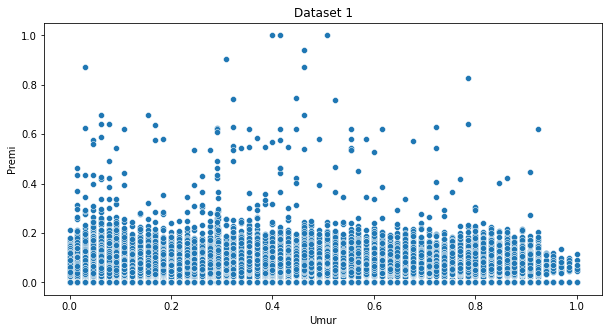

In [ ]:
# Scatter Plot Dataset 1
show_scatterplot(dataset1, title="Dataset 1")

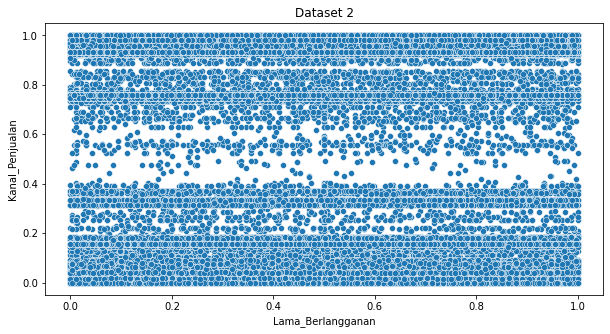

In [ ]:
# Scatter Plot Dataset 1
show_scatterplot(dataset2, title="Dataset 2")

# 3. Proses Clustering dengan K-Means

In [ ]:
class Kmeans:
  def __init__(self, n_clusters):
    self.n_clusters = n_clusters
    self.first_centroids = []
    self.labels = []
    self.last_centroids = []
    self.inertia = 0
  
  # membuat angka random untuk x dan y sebagai centroid
  def random_sample(self, low, high):
    return low + (high - low) * np.random.random()

  # menginisialisasi centroids
  def inisialisasi_centroids(self, data, k):
    x_min = y_min = float('inf')
    x_max = y_max = float('-inf')
    for dot in data:
      x_min = min(dot[0], x_min)
      x_max = max(dot[0], x_max)
      y_min = min(dot[1], y_min)
      y_max = max(dot[1], y_max)

    centroids = []
    for i in range(k):
      centroids.append([self.random_sample(x_min, x_max), self.random_sample(y_min, y_max)])
    
    return centroids

  #Menghitung Jarak
  def hitung_jarak(self, dot_1, dot_2):
    return ((dot_1[0] - dot_2[0]) ** 2 + (dot_1[1] - dot_2[1]) ** 2) ** 0.5

  # mengclusterkan setiap row data dengan centroidnya
  # menghitung rata2
  def get_labels(self, data, centroids):
    labels = []
    inertias = []
    for dot in data:
      min_dist = float('inf')
      label = None
      for i, centroid in enumerate(centroids):
        new_dist = self.hitung_jarak(dot, centroid)
        if min_dist > new_dist:
          min_dist = new_dist
          label = i
      labels.append(label)
      inertias.append([min_dist])
    return np.asarray(labels), np.sum(inertias)

  # menghitung nilai rata-rata jarak antar data dengan centroidnya
  # merubah posisi centroid ke nilai rata2 yang telah di hitung
  def update_centroids(self, data, labels, k):
    new_centroids = [[0, 0] for i in range(k)]
    counts = [0] * k
    
    for dot, label in zip(data, labels):
      new_centroids[label][0] += dot[0]
      new_centroids[label][1] += dot[1]
      counts[label] += 1

    for i, (x,y) in enumerate(new_centroids):
      new_centroids[i] = (np.divide(x, counts[i], out=np.zeros_like(x), where=counts[i]!=0, ), np.divide(y, counts[i], out=np.zeros_like(y), where=counts[i]!=0))
    return new_centroids
 
  # menghentikan perulangan K-Means dengan kondisi tidak ada perubahan posisi pada centroidnya
  # threshold digunakan untuk membandingakan perubahan pada centroidnya
  def stop_loop(self, old_centroids, new_centroids, threshold=1e-5):
    total_pergerakan = 0
    for old_dot, new_dot in zip(old_centroids, new_centroids):
      total_pergerakan += self.hitung_jarak(old_dot, new_dot)
    return total_pergerakan < threshold
  
  #Fit Data
  def fit(self, data):
    self.first_centroids = self.inisialisasi_centroids(data, self.n_clusters)
    centroids = self.first_centroids
    total_movement = 0

    while True:
      old_centroids = centroids
      self.labels, self.inertia = self.get_labels(data, centroids)
      centroids = self.update_centroids(data, self.labels, self.n_clusters)
      if self.stop_loop(old_centroids, centroids, threshold=1e-5):
        self.last_centroids = centroids
        break
      total_movement += 1

    print(f"Total Movement dengan n_clusters-{k} : {total_movement}")


# menggabungkan dataset dengan label
def bind_labels(dataset, labels):
  mdataset = dataset.copy()
  mdataset['Tertarik'] = labels.copy()
  mdataset['Tertarik'] = mdataset['Tertarik'].astype('str')
  var_map = {}
  for i in mdataset['Tertarik'].unique():
    var_map[str(i)] = "Cluster "+str(i)
  mdataset['Tertarik'].replace(var_map, inplace=True)
  return mdataset

## 3.1. Clustering Dataset-1

### 3.1.1. Evaluasi Model dengan Elbow Method dan Silhouette Score

In [ ]:
# menambilkan plot dengan algoritma elbow method
def show_elbow_method(inertias, K, title, figsize=(12,5)):
  plt.figure(figsize=figsize)
  plt.plot(K, inertias, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Distortion')
  plt.title('The Elbow Method showing the optimal k '+title)
  plt.show()

def show_silhouette_score(dataset, sil_coeffecients, K):
  for n_cluster, sil_coeff in zip(K, sil_coeffecients):
    print("untuk n_clusters={}, Silhouette Coefficient = {}".format(n_cluster, sil_coeff))
    
  plt.figure(figsize=(12,5))
  plt.plot(K, sil_coeffecients)
  plt.ylabel('Silhouette Coefficient')
  plt.xlabel('No. of Clusters')
  plt.show()

  sil_best = max(sil_coeffecients)
  k_best_index = sil_coeffecients.index(sil_best)
  k_best = K[k_best_index]
  print("Optimum Number of Clusters:", k_best)

# Menampilkan Scatter plot dan Silhouette plot
def show_silhouette_and_scatter(dataset, centroids, labels, k, title, columns):
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  ax1.set_xlim([-0.1, 1])
  ax1.set_ylim([0, len(dataset) + (k + 1) * 10])

  # Silhouette plot
  # Menghitung Silhouette Samples
  silhouette_avg = silhouette_score(dataset, labels)
  sample_silhouette_values = silhouette_samples(dataset, labels)

  y_lower = 10
  for i in range(k):
      ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
      ith_cluster_silhouette_values.sort()
      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i
      color = cm.nipy_spectral(float(i) / k)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

      # Melabeli Silhouette plot
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, "Centroid "+str(i))

      y_lower = y_upper + 10

  ax1.set_title("Silhouette plot")
  ax1.set_xlabel("The Silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  # Draw garis tegak merah
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  # Scatter Plot
  colors = cm.nipy_spectral(labels.astype(float) / k)
  ax2.scatter(dataset[:, 0], dataset[:, 1], marker='.', s=30, lw=0, alpha=0.7,
              c=colors, edgecolor='k')

  # Labeling the clusters
  centers = np.asarray(centroids)
  # Draw white circles at cluster centers
  ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker=f'$Centroid {str(i)}$', alpha=1,
                  s=2500, edgecolor='red')

  ax2.set_title("Scatter plot")
  ax2.set_xlabel(columns[0])
  ax2.set_ylabel(columns[1])

  plt.suptitle((f"Analisis Silhouette dengan KMeans clustering pada {title} dengan k = {k}"), fontsize=14, fontweight='bold')

  plt.show()

In [ ]:
# distortions_dataset1 digunakan untuk menampung nilai inertia dari setiap nilai K
sse_dataset1 = []
silhouette_score_dataset1 = []
k_max = 10
K = range(1, k_max)
for k in K:
  model1 = Kmeans(k)
  model1.fit(dataset1.values)
  sse_dataset1.append(model1.inertia)
  if k > 1:
    silhouette_score_dataset1.append(silhouette_score(dataset1.iloc[:1000, [0,1]].values, model1.labels[:1000]))

Total Movement dengan n_clusters-1 : 1
Total Movement dengan n_clusters-2 : 8
Total Movement dengan n_clusters-3 : 21
Total Movement dengan n_clusters-4 : 14
Total Movement dengan n_clusters-5 : 14
Total Movement dengan n_clusters-6 : 16
Total Movement dengan n_clusters-7 : 15
Total Movement dengan n_clusters-8 : 42
Total Movement dengan n_clusters-9 : 39


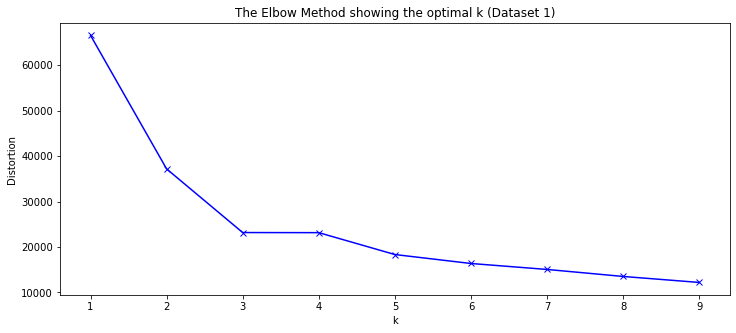

In [ ]:
# Menampilkan plot dari distortions_dataset1 dengan tujuan untuk evaluasi menggunakan Elbow Method
show_elbow_method(sse_dataset1, K, title="(Dataset 1)")

dari hasil evaluasi Elbow Method diatas didapatkan bahwa nilai K optimum berada pada K = 5

untuk n_clusters=2, Silhouette Coefficient = 0.5998531932779971
untuk n_clusters=3, Silhouette Coefficient = 0.6128841682507439
untuk n_clusters=4, Silhouette Coefficient = 0.6128841682507439
untuk n_clusters=5, Silhouette Coefficient = 0.5735633872139038
untuk n_clusters=6, Silhouette Coefficient = 0.5112905251659366
untuk n_clusters=7, Silhouette Coefficient = 0.5301199377951525
untuk n_clusters=8, Silhouette Coefficient = 0.4244793737044397
untuk n_clusters=9, Silhouette Coefficient = 0.4250447645744632


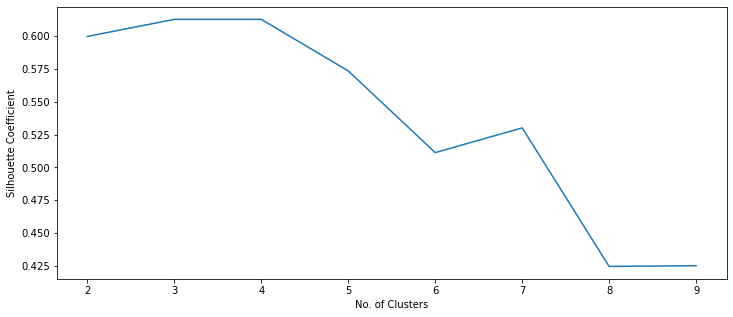

Optimum Number of Clusters: 3


In [ ]:
# menampilkan Silhoutte score pada grafik
show_silhouette_score(dataset1, silhouette_score_dataset1, range(2, k_max))

dari evaluasi model menggunakan Elbow Method dan Silhouette Score didapatkan nilai k optimum pada model diatas adalah 3

In [ ]:
# Dengan menggunakan nilai k = 3 dari hasil evaluasi model didapatkan clustering sebagai berikut
# Running algoritma Clustering K-Means dengan ketentuan sebagai berikut :
#   - Dataset = Dataset1
#   - k       = 3
k = 3
model1 = Kmeans(k)
model1.fit(dataset1.values)
print("SSE : ", model1.inertia)

Total Movement dengan n_clusters-3 : 22
SSE :  23154.913872991056


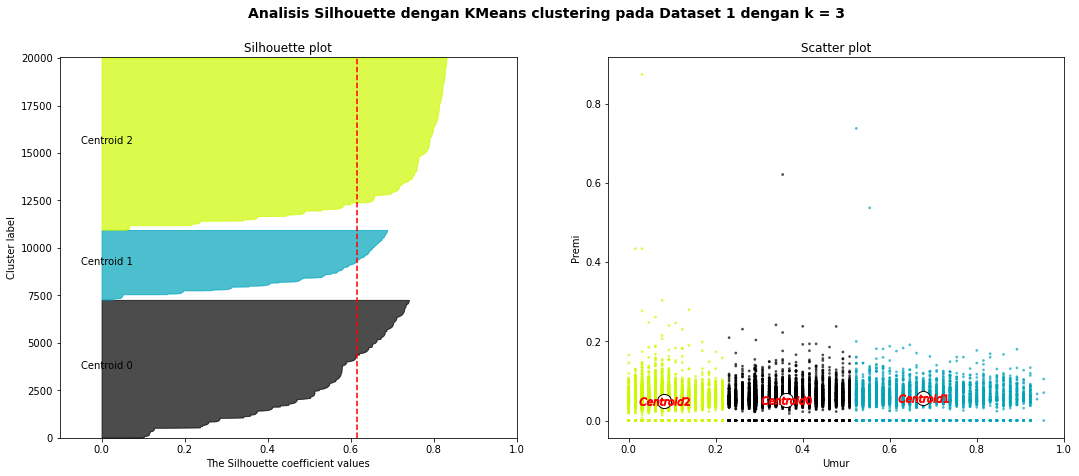

In [ ]:
show_silhouette_and_scatter(dataset1.iloc[:20000, [0,1]].values, model1.last_centroids, np.array(model1.labels[:20000]), k=k, title="Dataset 1", columns=dataset1.columns)

### 3.1.2. Scatterplot

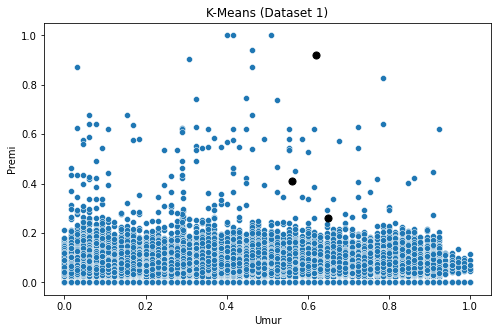

In [ ]:
# Menampilkan Scatterplot dari dataset-1 dan Centroid awal dari dataset-1
show_scatterplot(dataset1, title="K-Means (Dataset 1)", centroids=model1.first_centroids, figsize=(8,5))

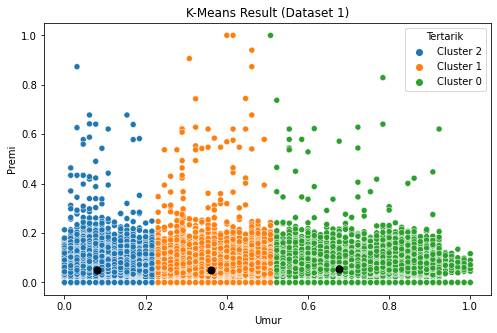

In [ ]:
# result_dataset1 adalah hasil gabungan dataset1 dengan result_label_dataset1
result_dataset1 = bind_labels(dataset1, model1.labels)
# Menampilkan Scatterplot dari dataset-1 dan Centroid Akhir dari dataset-1
show_scatterplot(result_dataset1, title="K-Means Result (Dataset 1)", centroids=model1.last_centroids, target="Tertarik", figsize=(8,5))

## 3.2. Clustering Dataset-2

### 3.2.1. Evaluasi Model dengan Elbow Method dan Silhouette Score

In [ ]:
# distortions_dataset1 digunakan untuk menampung nilai inertia dari setiap nilai K
sse_dataset2 = []
silhouette_score_dataset2 = []
k_max = 10
K = range(1, k_max)
for k in K:
  model2 = Kmeans(k)
  model2.fit(dataset2.values)
  sse_dataset2.append(model2.inertia)
  if k > 1:
    silhouette_score_dataset2.append(silhouette_score(dataset2.iloc[:1000, [0,1]].values, model2.labels[:1000]))

Total Movement dengan n_clusters-1 : 1
Total Movement dengan n_clusters-2 : 37
Total Movement dengan n_clusters-3 : 5
Total Movement dengan n_clusters-4 : 6
Total Movement dengan n_clusters-5 : 8
Total Movement dengan n_clusters-6 : 16
Total Movement dengan n_clusters-7 : 14
Total Movement dengan n_clusters-8 : 24
Total Movement dengan n_clusters-9 : 17


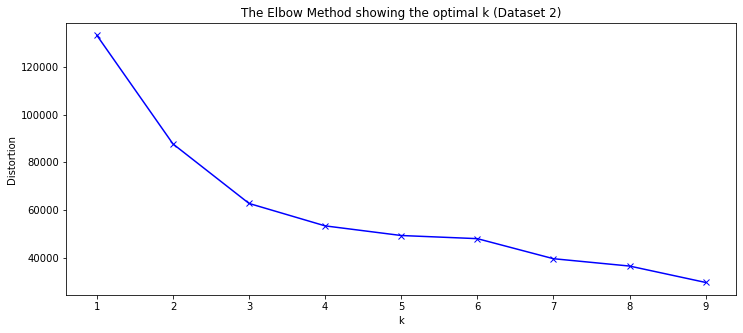

In [ ]:
# Menampilkan plot dari distortions_dataset2 dengan tujuan untuk evaluasi menggunakan Elbow Method
show_elbow_method(sse_dataset2, K, title="(Dataset 2)")

untuk n_clusters=2, Silhouette Coefficient = 0.5641360707137463
untuk n_clusters=3, Silhouette Coefficient = 0.5258863655336409
untuk n_clusters=4, Silhouette Coefficient = 0.5193446466910427
untuk n_clusters=5, Silhouette Coefficient = 0.5188965011513755
untuk n_clusters=6, Silhouette Coefficient = 0.507625868450767
untuk n_clusters=7, Silhouette Coefficient = 0.47482918075537295
untuk n_clusters=8, Silhouette Coefficient = 0.4187763676081529
untuk n_clusters=9, Silhouette Coefficient = 0.4649479289777479


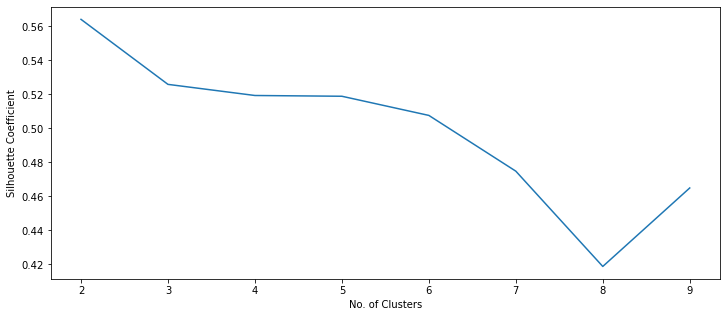

Optimum Number of Clusters: 2


In [ ]:
# menampilkan Silhoutte score pada grafik
show_silhouette_score(dataset2, silhouette_score_dataset2, range(2, k_max))

dari evaluasi model menggunakan Elbow Method dan Silhouette Score didapatkan nilai k optimum pada model diatas adalah 3

In [ ]:
# Dengan menggunakan nilai k = 2 dari hasil evaluasi model didapatkan clustering sebagai berikut
# Running algoritma Clustering K-Means dengan ketentuan sebagai berikut :
#   - Dataset = Dataset2
#   - k       = 2
k = 2
model2 = Kmeans(k)
model2.fit(dataset2.values)
print("SSE : ", model2.inertia)

Total Movement dengan n_clusters-2 : 9
SSE :  86357.28704663718


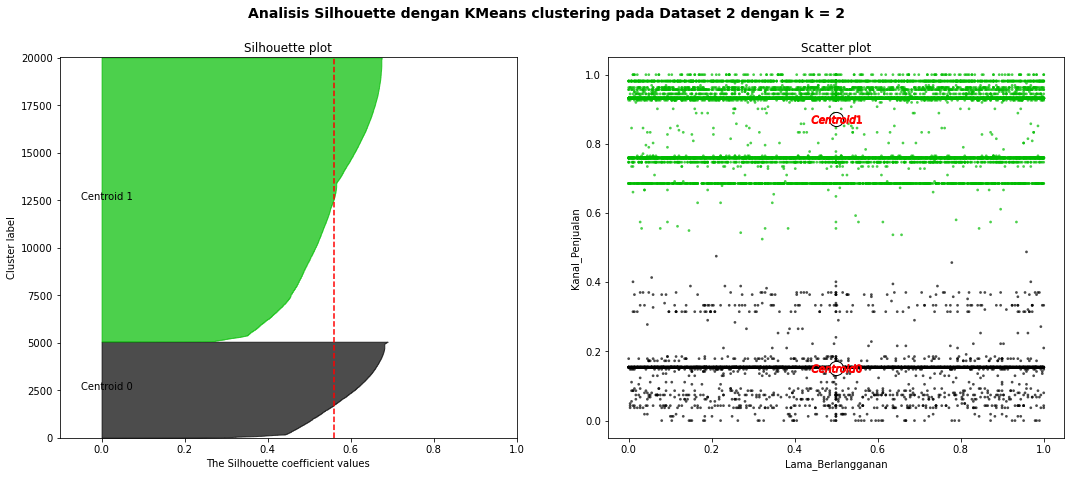

In [ ]:
show_silhouette_and_scatter(dataset2.iloc[:20000, [0,1]].values, model2.last_centroids, np.array(model2.labels[:20000]), k=k, title="Dataset 2", columns=dataset2.columns)

### 3.2.1. Scatterplot

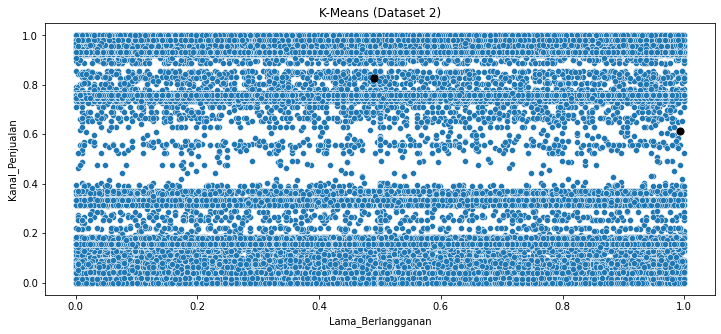

In [ ]:
# Menampilkan Scatterplot dari dataset-2 dan Centroid awal dari dataset-2
show_scatterplot(dataset2, title="K-Means (Dataset 2)", centroids=model2.first_centroids, figsize=(12,5))

C:\Users\nauva\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


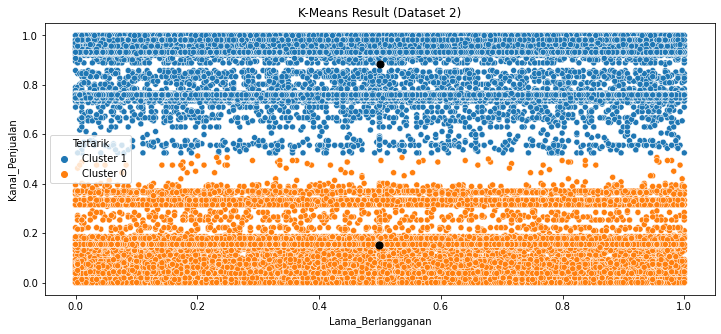

In [ ]:
# result_dataset2 adalah hasil gabungan dataset2 dengan result_label_dataset2
result_dataset2 = bind_labels(dataset2, model2.labels)
# Menampilkan Scatterplot dari dataset-2 dan Centroid Akhir dari dataset-2
show_scatterplot(result_dataset2, title="K-Means Result (Dataset 2)", centroids=model2.last_centroids, target="Tertarik", figsize=(12,5))

# 4. Experiment menggunakan PCA

Mereduksi data menjadi 2 dimensi. data yang digunakan adalah gabungan dataset1 dengan dataset2 (4 dimensi)

In [ ]:
df_for_PCA = dataset1.join(dataset2)
df_for_PCA

,Umur,Premi,Lama_Berlangganan,Kanal_Penjualan
0,0.153846,0.047251,0.301038,0.932099
1,0.430769,0.043104,0.512111,0.172840
2,0.015385,0.056002,0.377163,0.981481
3,0.584615,0.000000,0.183391,0.759259
4,0.461538,0.059953,0.636678,0.537037
...,...,...,...,...
333137,0.630769,0.052851,0.197232,0.759259
333138,0.323077,0.000000,0.768166,0.962963
333139,0.061538,0.056687,0.695502,0.932099
333140,0.600000,0.065406,0.792388,0.154321


In [ ]:
pca = PCA(n_components=2)
temp_pca = pca.fit_transform(df_for_PCA)
df_pca = pd.DataFrame(data=temp_pca, columns=['pca1','pca2'])
df_pca

,pca1,pca2
0,-0.272431,-0.198250
1,0.526909,0.012749
2,-0.381807,-0.122067
3,0.084562,-0.316075
4,0.221729,0.137274
...,...,...
333137,0.107073,-0.302264
333138,-0.219155,0.268806
333139,-0.316330,0.196254
333140,0.624189,0.292946


In [ ]:
# Running algoritma Clustering K-Means dengan ketentuan sebagai berikut :
#   - Dataset = df_pca
#   - k       = 2
k = 2
model_pca = Kmeans(k)
model_pca.fit(df_pca.values)
print("SSE : ", model_pca.inertia)

Total Movement dengan n_clusters-2 : 9
SSE :  95948.87103247848


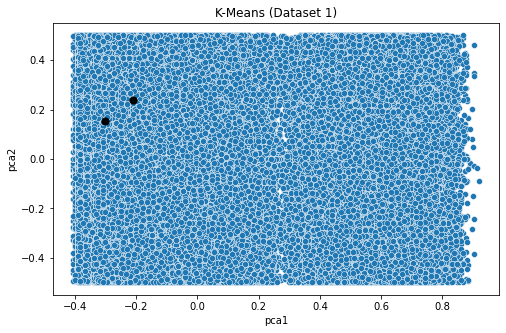

In [ ]:
# Menampilkan Scatterplot dari df_pca dan Centroid awal dari df_pca
show_scatterplot(df_pca, title="K-Means (Dataset 1)", centroids=model_pca.first_centroids, figsize=(8,5))

C:\Users\nauva\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


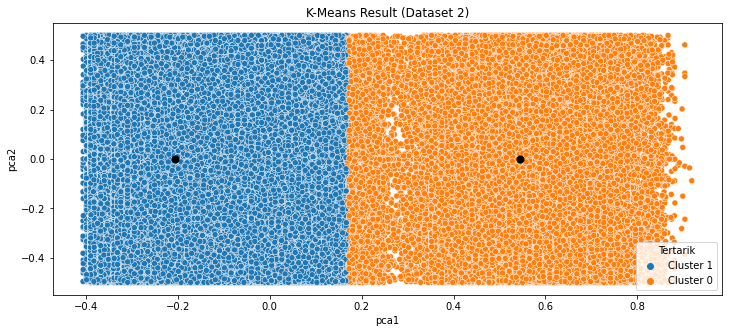

In [ ]:
# result_dataset2 adalah hasil gabungan dataset2 dengan labels
result_df_pca = bind_labels(df_pca, model_pca.labels)
# Menampilkan Scatterplot dari df_pca dan Centroid Akhir dari df_pca
show_scatterplot(result_df_pca, title="K-Means Result (Dataset 2)", centroids=model_pca.last_centroids, target="Tertarik", figsize=(12,5))